# Overview
Klasifikasi binary body style pokemon. Apakah pokemon tersebut memiliki body style `bipedal_tailed` atau `quadruped` berdasarkan dengan beberapa atribut yang dimiliki setiap pokemon. Yakni :

`['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']`

**Machine Learning Step by step :**
1. [x] Memilah dataframe sesuai data yang diperlukan
2. [x] Mengkonversi kategori data (string) dengan encoding (menjadi int)
3. [x] Menggunakan `RandomForestClassifier` sebagai machine learning model
4. [x] Melatih Model dan membuat prediksi
5. [x] Mengkonversi ulang prediksi ke dalam data kategori (string)
6. [x] Evaluasi model, untuk meningkatkan akurasi model
7. [x] Resolusi

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Menampilkan Dataframe

In [7]:
dataframe = pd.read_csv('pokemon-structured-data.csv')
dataframe.drop('Number',axis=1,inplace=True)

In [8]:
dataframe.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


# Seleksi Dataframe

In [9]:
x_columns = ['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']
y_columns = ['Body_Style']
body_style_filter = ['bipedal_tailed','quadruped']

In [10]:
# Hapus Body_Style selain bipedal_tailed dan quadruped dari dataframe
dataframe = dataframe[dataframe.loc[:,'Body_Style'].isin(body_style_filter)]

In [11]:
# Gunakan kolom yang hanya akan dipakai
dataframe = dataframe.loc[:,x_columns + y_columns]

In [12]:
dataframe.head()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Body_Style
0,45,49,49,65,65,45,quadruped
1,60,62,63,80,80,60,quadruped
2,80,82,83,100,100,80,quadruped
3,39,52,43,60,50,65,bipedal_tailed
4,58,64,58,80,65,80,bipedal_tailed


# Pemisahan Data

In [13]:
# Memisahkan data dan label
data = dataframe.drop('Body_Style',axis=1)
label = dataframe['Body_Style']

In [16]:
# Konversi data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
numeric_label = encoder.fit_transform(label)

In [17]:
# Memisahkan data train dan test
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(data,numeric_label,test_size=0.2)

# Memilih Machine Learning Classifier (Machine learning model)

In [19]:
# Untuk masalah klasifikasi, kita akan menggunakan RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Gunakan paramerter n_estimator 100 sebagai default
model = RandomForestClassifier(n_estimators=100)

In [21]:
# Melatih machine learning model dengan fit() method
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Membuat Prediksi

In [22]:
prediction = model.predict(x_test)

In [44]:
encoder.inverse_transform(prediction)

array(['bipedal_tailed', 'bipedal_tailed', 'bipedal_tailed', 'quadruped',
       'quadruped', 'quadruped', 'bipedal_tailed', 'quadruped',
       'bipedal_tailed', 'bipedal_tailed', 'quadruped', 'bipedal_tailed',
       'bipedal_tailed', 'bipedal_tailed', 'quadruped', 'quadruped',
       'quadruped', 'bipedal_tailed', 'bipedal_tailed', 'bipedal_tailed',
       'bipedal_tailed', 'bipedal_tailed', 'bipedal_tailed',
       'bipedal_tailed', 'quadruped', 'quadruped', 'quadruped',
       'bipedal_tailed', 'bipedal_tailed', 'quadruped', 'bipedal_tailed',
       'bipedal_tailed', 'bipedal_tailed', 'bipedal_tailed',
       'bipedal_tailed', 'bipedal_tailed', 'bipedal_tailed', 'quadruped',
       'bipedal_tailed', 'quadruped', 'quadruped', 'bipedal_tailed',
       'quadruped', 'bipedal_tailed', 'quadruped', 'quadruped',
       'bipedal_tailed', 'bipedal_tailed', 'quadruped', 'bipedal_tailed',
       'bipedal_tailed', 'bipedal_tailed', 'bipedal_tailed',
       'bipedal_tailed', 'quadruped', 'quad

# Matrix Error : Untuk Menganalisis Hasil Model

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
# Mendapatkan akurasi model
accuracy_score(y_test,prediction)

0.5254237288135594

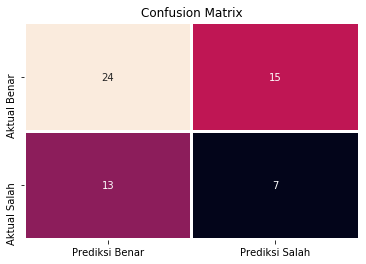

In [53]:
sns.heatmap(confusion_matrix(y_test,prediction),cbar=False,annot=True,linewidths=2)
plt.title('Confusion Matrix')
plt.xticks([0.5,1.5],['Prediksi Benar','Prediksi Salah'])
plt.yticks([0.5,1.5],['Aktual Benar','Aktual Salah'])
plt.show()

In [54]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63        39
           1       0.32      0.35      0.33        20

    accuracy                           0.53        59
   macro avg       0.48      0.48      0.48        59
weighted avg       0.54      0.53      0.53        59



# Evaluasi Model

In [55]:
from sklearn.model_selection import GridSearchCV

In [59]:
params = {'n_estimators' : list(range(20,220,20))}

In [66]:
# Mencoba berbagai n_estimator dan cross validation dengan GridSearchCV() dan menemukan akurasi yang terbaik di antaranya
best_model = GridSearchCV(RandomForestClassifier(),params,cv=5,refit=True,verbose=1,iid=False)

In [67]:
best_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [70]:
best_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
# Melihat akurasi sebelum evaluasi model
accuracy_score(y_test,prediction)

0.5254237288135594

In [75]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63        39
           1       0.32      0.35      0.33        20

    accuracy                           0.53        59
   macro avg       0.48      0.48      0.48        59
weighted avg       0.54      0.53      0.53        59



In [72]:
best_prediction = best_model.predict(x_test)

In [73]:
accuracy_score(y_test,best_prediction)

0.5932203389830508

In [74]:
print(classification_report(y_test,best_prediction))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        39
           1       0.42      0.55      0.48        20

    accuracy                           0.59        59
   macro avg       0.58      0.58      0.57        59
weighted avg       0.62      0.59      0.60        59



# Resolusi
**1. Kapan harus memperhatikan akurasi ?**
Akurasi dapat digunakan sebagai penilaian kualitas model atau sukses tidaknya model dilatih, jika setiap kelas atau kategori dalam data memiliki jumlah yang sama atau minimal dengan selisih yang kecil. Untuk kasus kali ini, kita dapat memperhatikan akurasi sebagai pertimbangan tersebut

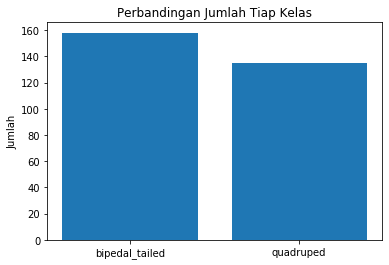

In [76]:
plt.bar([0,1],[len([i for i in dataframe['Body_Style'] if i == 'bipedal_tailed']),len([i for i in dataframe['Body_Style'] if i == 'quadruped'])])
plt.title('Perbandingan Jumlah Tiap Kelas')
plt.xticks([0,1],['bipedal_tailed','quadruped'])
plt.ylabel('Jumlah')
plt.show()

**2. Jika data sudah pas, Kenapa akurasi hanya 50% ?**
Karena jumlah data yang hanya sedikit. Benar sekali, sebuah model dapat berjalan dengan baik jika diberi data yang banyak. Semakin banyak data, semakin banyak yang dapat dipelajari model, dan sebaliknya. Setidaknya, terdapat lebih dari 100 data untuk masing masing kelas. Akurasi 50% tidak buruk, mungkin akurasi dapat lebih tinggi jika menggunakan deep learning

**3. Bagaimana cara meningkatkan akurasi model ?**
Cara yang paling ampuh, adalah dengan menambah jumlah data. Seperti yang sudah dibahas sebelumnya. Cara alternatif adalah dengan _tuning hyperparameter_ machine learning model, seperti pada model diatas, kita _tuning_ model dengan cara mencoba berbagai n_estimator dan cross validation dengan GridSearchCV(). Semua parameter yang tersedia untuk di-_tuning_ bisa dilihat dengan method `get_params()`

In [77]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}